https://www.kaggle.com/datasets/sachsene/carla-traffic-lights-images

In [1]:
from glob import glob
import os

# 이미지가 저장되어 있는 경로 지정
root = './datasets/light/original/'

# 해당 경로를 통해 이미지 폴더를 찾아오기
directories = glob(os.path.join(root, '*'))

In [2]:
directories

['./datasets/light/original\\back',
 './datasets/light/original\\green',
 './datasets/light/original\\red',
 './datasets/light/original\\yellow']

In [3]:
# 폴더 이름 저장할 초기 list 생성
directory_names = []

In [4]:
for directory in directories:
    # 디렉토리의 이름을 찾아와서 list에 저장
    directory_names.append(directory[directory.rindex('\\') + 1:])

In [5]:
# # 이미지 별 폴더 안 이미지들의 파일명 변경
# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(root + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

#         os.rename(old_file, new_file)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 훈련 데이터 이미지 전처리 및 픽셀 값 조정 객체 선언
image_data_generator = ImageDataGenerator(rescale=1./255)

In [7]:
# 디렉토리에서 이미지를 가져와 배치로 변환
generator = image_data_generator.flow_from_directory(root, target_size=(244, 244), batch_size=32, class_mode='categorical')

Found 2143 images belonging to 4 classes.


In [8]:
print(generator.class_indices)

{'back': 0, 'green': 1, 'red': 2, 'yellow': 3}


In [9]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성
l_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
l_df.loc[:, 'file_paths'] = l_df.file_paths.apply(lambda x: x.replace('\\', '/'))
l_df

,file_paths,targets
0,./datasets/light/original/back/back1.png,0
1,./datasets/light/original/back/back10.png,0
2,./datasets/light/original/back/back100.png,0
3,./datasets/light/original/back/back101.png,0
4,./datasets/light/original/back/back102.png,0
...,...,...
2138,./datasets/light/original/yellow/yellow95.png,3
2139,./datasets/light/original/yellow/yellow96.png,3
2140,./datasets/light/original/yellow/yellow97.png,3
2141,./datasets/light/original/yellow/yellow98.png,3


In [10]:
from sklearn.model_selection import train_test_split

# 학습 및 검증용 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(l_df.file_paths, l_df.targets, stratify=l_df.targets, test_size=0.2, random_state=124)

In [11]:
# 정답(타겟) 비중 확인
print(y_train.value_counts())
print(y_test.value_counts())

targets
2    451
1    447
0    414
3    402
Name: count, dtype: int64
targets
2    113
1    112
0    103
3    101
Name: count, dtype: int64


In [12]:
import shutil
import os

# 경로 지정
root = './datasets/light/'

for file_path in X_train:
    # 이미지 파일의 원본 디렉터리 경로 저장
    light_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    # 이미지 파일을 복사할 훈련용 디렉터리의 경로 저장
    destination = os.path.join(root, 'train/' + light_dir)

    # 훈련용 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    # 이미지 파일을 훈련용 디렉터리로 복사
    shutil.copy2(file_path, destination)

In [13]:
import shutil

root = './datasets/light/'

for file_path in X_test:
    # 이미지 파일의 원본 디렉터리 경로 저장
    light_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    # 이미지 파일을 복사할 훈련용 디렉터리의 경로 저장
    destination = os.path.join(root, 'test/' + light_dir)

    # 훈련용 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    # 이미지 파일을 훈련용 디렉터리로 복사
    shutil.copy2(file_path, destination)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 입력 데이터 크기 지정
IMAGE_SIZE = 244

# 훈련, 검증, 테스트 이미지 폴더 경로 지정
train_dir = './datasets/light/train'
validation_dir = './datasets/light/val'
test_dir = './datasets/light/test'

# 이미지의 픽셀 값을 0에서 255 사이에서 0에서 1 사이의 값으로 조정
train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 디렉토리에서 이미지를 가져와 배치로 변환
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 1714 images belonging to 4 classes.
Found 383 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
{'back': 0, 'green': 1, 'red': 2, 'yellow': 3}
{'back': 0, 'green': 1, 'red': 2, 'yellow': 3}
{'back': 0, 'green': 1, 'red': 2, 'yellow': 3}


In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
INPUT_SIZE = 244

# Input layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)

# Dense Layer (은닉층)
x = Dense(32, activation='relu', name='classifierAD01')(x)

# Dense Layer (출력층)
output = Dense(4, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 122, 122, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 952576)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 32)                  │      30,482,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,501,988 (116.36 MB)

 Trainable params: 30,501,988 (116.36 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [18]:
# 훈련
history = model.fit(train_generator, 
                    batch_size=32, 
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/20


C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - acc: 0.7547 - loss: 3.2407 - val_acc: 0.9739 - val_loss: 0.0687 - learning_rate: 0.0010
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - acc: 0.9945 - loss: 0.0178 - val_acc: 0.9843 - val_loss: 0.0786 - learning_rate: 0.0010
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - acc: 0.9933 - loss: 0.0343 - val_acc: 0.9713 - val_loss: 0.2178 - learning_rate: 0.0010
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - acc: 1.0000 - loss: 0.0043 - val_acc: 0.9739 - val_loss: 0.1180 - learning_rate: 1.0000e-04


In [21]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 748ms/step - acc: 1.0000 - loss: 0.0036


[0.0049146548844873905, 1.0]

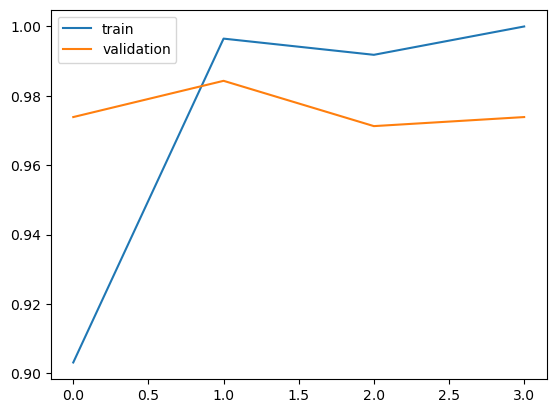

In [22]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [7]:
import albumentations as A

# 이미지 전처리 함수 선언
def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
    ], p=0.5)

    return aug(image=image)['image']

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 훈련, 검증, 테스트 이미지 폴더 경로 지정
train_dir = './datasets/light/train'

# 입력 데이터 크기 지정
IMAGE_SIZE = 244

# 이미지의 픽셀 값을 0에서 255 사이에서 0에서 1 사이의 값으로 조정
alb_image_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

# 디렉토리에서 이미지를 가져와 배치로 변환
alb_train_generator = alb_image_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(alb_train_generator.class_indices)

Found 1714 images belonging to 4 classes.
{'back': 0, 'green': 1, 'red': 2, 'yellow': 3}


In [40]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
INPUT_SIZE = 244

# Input layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)

# Dense Layer (은닉층)
x = Dense(32, activation='relu', name='classifierAD01')(x)

# Dense Layer (출력층)
output = Dense(4, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 122, 122, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 952576)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 32)                  │      30,482,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,501,988 (116.36 MB)

 Trainable params: 30,501,988 (116.36 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [42]:
# 훈련
history = model.fit(alb_train_generator, 
                    batch_size=32, 
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - acc: 0.5918 - loss: 3.9123 - val_acc: 0.9843 - val_loss: 0.1461 - learning_rate: 0.0010
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - acc: 0.7998 - loss: 0.3801 - val_acc: 0.9791 - val_loss: 0.0920 - learning_rate: 0.0010
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - acc: 0.7993 - loss: 0.3886 - val_acc: 0.9896 - val_loss: 0.1013 - learning_rate: 0.0010


In [43]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 470ms/step - acc: 0.9921 - loss: 0.0245


[0.04238708317279816, 0.9883449673652649]

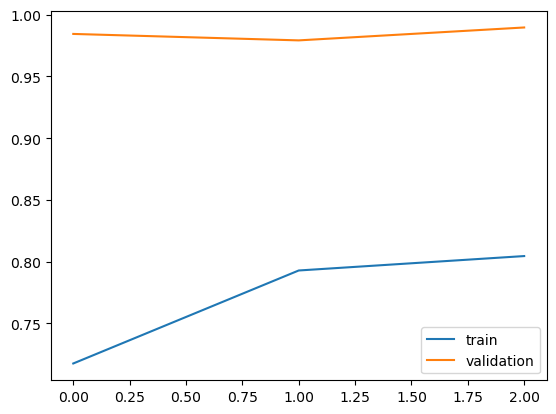

In [44]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [45]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
INPUT_SIZE = 244

# Input layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)

# Dense Layer (은닉층)
x = Dense(32, activation='relu', name='classifierAD01')(x)
x = Dense(64, activation='relu', name='classifierAD02')(x)

# Dense Layer (출력층)
output = Dense(4, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 122, 122, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 1905152)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 32)                  │      60,964,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD02 (Dense)               │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,190,500 (233.42 MB)

 Trainable params: 61,190,500 (233.42 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [48]:
# 훈련
history = model.fit(alb_train_generator, 
                    batch_size=32, 
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 613s 11s/step - acc: 0.5416 - loss: 2.5695 - val_acc: 0.9608 - val_loss: 0.0981 - learning_rate: 0.0010
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 601s 11s/step - acc: 0.7973 - loss: 0.4146 - val_acc: 0.9843 - val_loss: 0.0900 - learning_rate: 0.0010
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 602s 11s/step - acc: 0.8308 - loss: 0.3413 - val_acc: 0.9896 - val_loss: 0.1210 - learning_rate: 0.0010


In [49]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - acc: 0.9885 - loss: 0.1136


[0.10228634625673294, 0.9860140085220337]

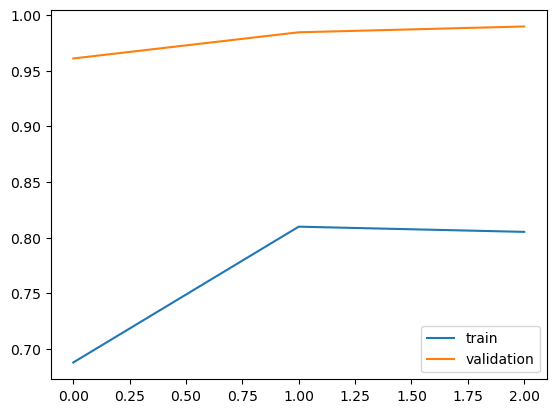

In [50]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [63]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
INPUT_SIZE = 244

# Input layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)

# Dense Layer (은닉층)
x = Dense(64, activation='relu', name='classifierAD01')(x)

# Dense Layer (출력층)
output = Dense(4, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 122, 122, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 122, 122, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 122, 122, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 3810304)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 64)                  │     243,859,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,748,612 (933.64 MB)

 Trainable params: 244,748,612 (933.64 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [53]:
# 훈련
history = model.fit(alb_train_generator, 
                    batch_size=32, 
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1203s 22s/step - acc: 0.5669 - loss: 4.1283 - val_acc: 0.9896 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 713s 13s/step - acc: 0.8191 - loss: 0.3859 - val_acc: 0.9869 - val_loss: 0.0383 - learning_rate: 0.0010
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2344s 43s/step - acc: 0.8051 - loss: 0.4024 - val_acc: 0.9922 - val_loss: 0.0979 - learning_rate: 0.0010
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2343s 43s/step - acc: 0.8068 - loss: 0.3871 - val_acc: 0.9817 - val_loss: 0.0722 - learning_rate: 0.0010
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2354s 44s/step - acc: 0.8064 - loss: 0.3706 - val_acc: 0.9922 - val_loss: 0.0480 - learning_rate: 1.0000e-04


In [54]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

14/14 ━━━━━━━━━━━━━━━━━━━━ 156s 11s/step - acc: 0.9893 - loss: 0.1338


[0.0504036620259285, 0.9953380227088928]

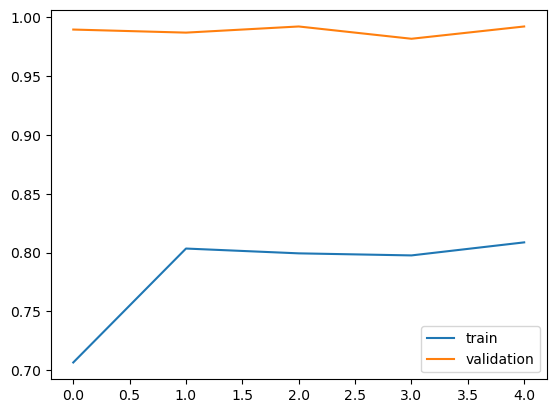

In [55]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [65]:
# 저장된 가중치 파일을 불러오기
model.load_weights('./callback_files/weights.002-0.0383-0.8034.weights.h5')

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


14/14 ━━━━━━━━━━━━━━━━━━━━ 159s 11s/step - acc: 0.9954 - loss: 0.0592


[0.11885010451078415, 0.9930070042610168]

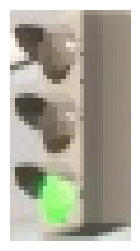

In [78]:
import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image = cv2.cvtColor(cv2.imread(alb_train_generator.filepaths[555]), cv2.COLOR_BGR2RGB)

# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [79]:
import numpy as np

resized_image = cv2.resize(image, (244, 244))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

In [80]:
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
model.predict(resized_image, batch_size=8)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


array([0., 1., 0., 0.], dtype=float32)

In [81]:
# 클래스 이름 지정
class_names = ['back', 'green', 'red', 'yellow']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
green


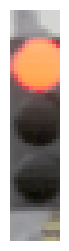

In [83]:
import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image = cv2.cvtColor(cv2.imread(alb_train_generator.filepaths[900]), cv2.COLOR_BGR2RGB)

show_image(image)

In [84]:
import numpy as np

resized_image = cv2.resize(image, (244, 244))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

In [85]:
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
model.predict(resized_image, batch_size=8)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


array([0., 0., 1., 0.], dtype=float32)

In [86]:
# 클래스 이름 지정
class_names = ['back', 'green', 'red', 'yellow']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
red


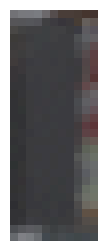

In [87]:
import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image = cv2.cvtColor(cv2.imread(alb_train_generator.filepaths[0]), cv2.COLOR_BGR2RGB)

show_image(image)

In [88]:
import numpy as np

resized_image = cv2.resize(image, (244, 244))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

In [89]:
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
model.predict(resized_image, batch_size=8)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step


array([1., 0., 0., 0.], dtype=float32)

In [90]:
# 클래스 이름 지정
class_names = ['back', 'green', 'red', 'yellow']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
back


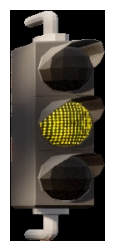

In [92]:
import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image = cv2.cvtColor(cv2.imread(alb_train_generator.filepaths[1610]), cv2.COLOR_BGR2RGB)

show_image(image)

In [93]:
import numpy as np

resized_image = cv2.resize(image, (244, 244))

# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

In [94]:
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
model.predict(resized_image, batch_size=8)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step


array([0., 0., 0., 1.], dtype=float32)

In [95]:
# 클래스 이름 지정
class_names = ['back', 'green', 'red', 'yellow']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
yellow


In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
INPUT_SIZE = 244

# Input layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 3))

# Convolutional Layer 1
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten(name='classifierA00')(x)

# Dense Layer (은닉층)
x = Dense(128, activation='relu', name='classifierAD01')(x)
x = Dense(64, activation='relu', name='classifierAD02')(x)
x = Dense(32, activation='relu', name='classifierAD03')(x)

# Dense Layer (출력층)
output = Dense(4, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 122, 122, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 122, 122, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 122, 122, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 3810304)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 128)                 │     487,719,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD02 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD03 (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 488,708,004 (1.82 GB)

 Trainable params: 488,708,004 (1.82 GB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [6]:
# 훈련
history = model.fit(alb_train_generator, 
                    batch_size=32, 
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[mcp_cb, rlr_cb, ely_cb]
                   )

NameError: name 'alb_train_generator' is not defined